In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Commodity dataset

In [2]:
df_commodity = pd.read_csv(filepath_or_buffer="D:\TRI-NIT\Dataset\Commodity_prices")
df_commodity.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


In [3]:
df_commodity.describe()

,min_price,max_price,modal_price
count,2238.000000,2238.000000,2238.000000
mean,2456.230563,2855.890527,2698.865952
std,3452.497680,3917.251520,3694.830905
min,0.000000,0.000000,2.000000
25%,800.000000,1000.000000,950.000000
50%,1700.000000,1960.000000,1831.500000
75%,3200.000000,3700.000000,3500.000000
max,110000.000000,130000.000000,120000.000000


In [4]:
# missing data
df_commodity.isna().sum()

state           0
district        0
market          0
commodity       0
variety         0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

## Exploratory Data Analysis

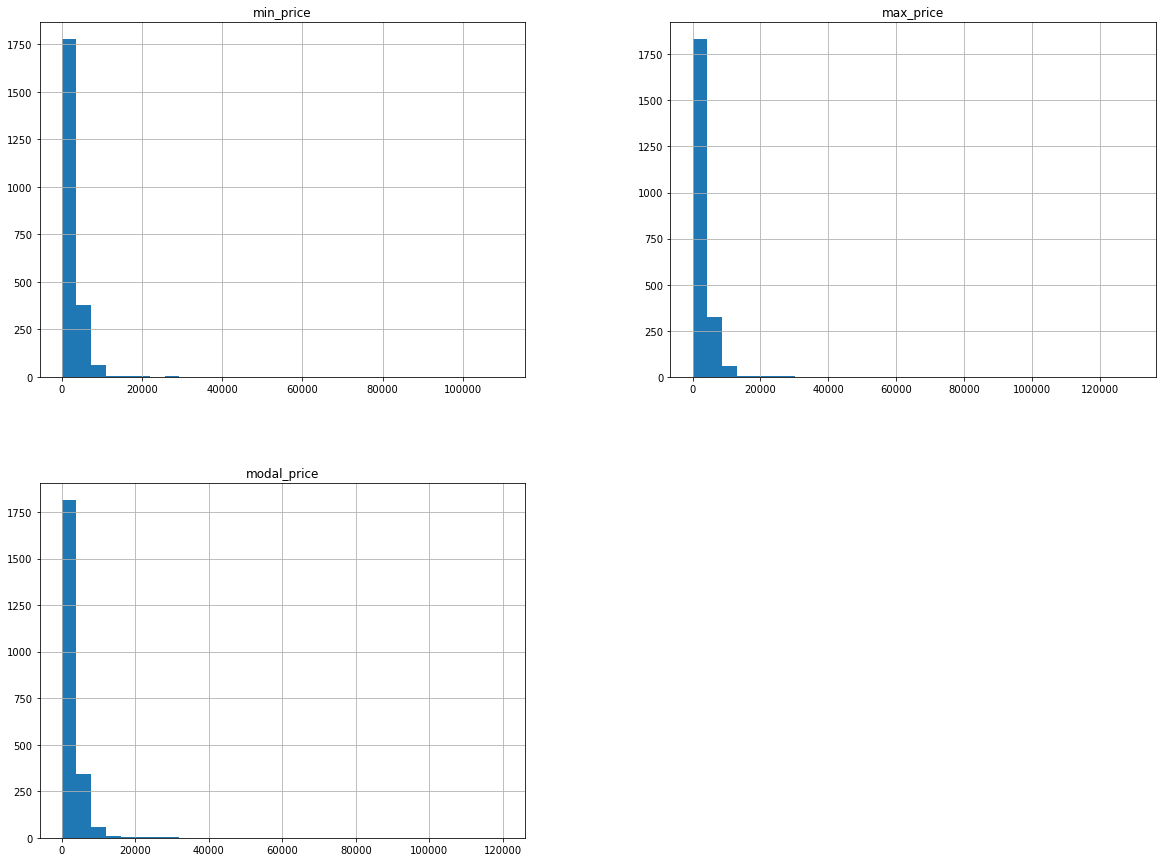

In [5]:
# Plot histograms to visualize the distribution of the numerical columns
df_commodity.hist(bins=30, figsize=(20,15))
plt.show()

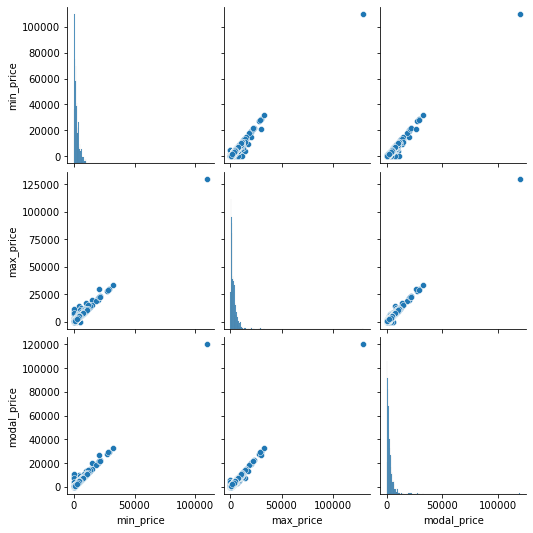

In [6]:
# Plot a pairplot to visualize the relationship between all numerical columns
sns.pairplot(df_commodity)
plt.show()

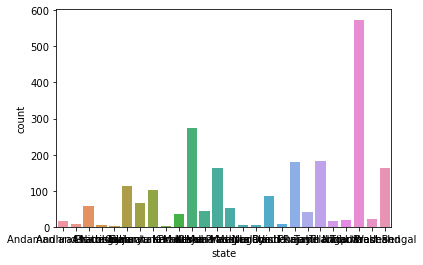

In [7]:
# Plot a bar plot to visualize the distribution of the categorical column "state"
sns.countplot(x="state", data=df_commodity)
plt.show()

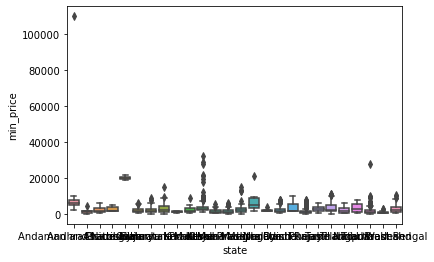

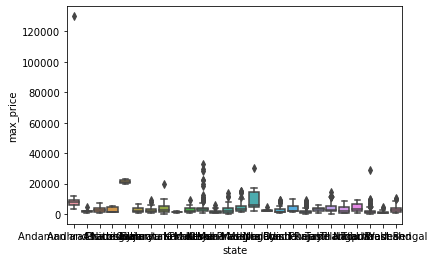

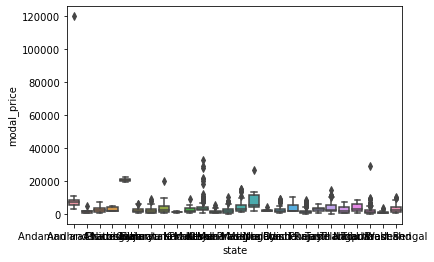

In [8]:
# Plot a box plot to visualize the distribution of the numerical columns "min_price", "max_price", "modal_price" by the categorical column "state"
sns.boxplot(x="state", y="min_price", data=df_commodity)
plt.show()
sns.boxplot(x="state", y="max_price", data=df_commodity)
plt.show()
sns.boxplot(x="state", y="modal_price", data=df_commodity)
plt.show()

## Crops dataset

In [9]:
df_crop = pd.read_csv("D:\TRI-NIT\Dataset\Crop_recommendation.csv")
df_crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## District vs Rainfall dataset

In [10]:
df_rainfall = pd.read_csv("D:\TRI-NIT\Dataset\district wise rainfall normal.csv")
k = df_rainfall["STATE_UT_NAME"].unique()
k.sort()
k

array(['ANDAMAN And NICOBAR ISLANDS', 'ANDHRA PRADESH',
       'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH', 'CHATISGARH',
       'DADAR NAGAR HAVELI', 'DAMAN AND DUI', 'DELHI', 'GOA', 'GUJARAT',
       'HARYANA', 'HIMACHAL', 'JAMMU AND KASHMIR', 'JHARKHAND',
       'KARNATAKA', 'KERALA', 'LAKSHADWEEP', 'MADHYA PRADESH',
       'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND',
       'ORISSA', 'PONDICHERRY', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARANCHAL',
       'WEST BENGAL'], dtype=object)

In [11]:
state_district = {}
for i in k:
    district = df_rainfall[df_rainfall["STATE_UT_NAME"]==i]["DISTRICT"].unique()
    district.sort()
    state_district[i] = district.tolist()
    



In [12]:
df_rainfall.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


## Data Preprocessing enuring the commodity and crops dataset having same label so that it can be mapped

In [13]:
df_crop["label"] = df_crop["label"].replace( ["rice","papaya","watermelon","muskmelon","apple","orange","coconut","jute","grapes","mango","banana","pomegranate","lentil","blackgram","maize","mungbean","mothbeans","coffee","cotton","pigeonpeas","kidneybeans","chickpea"],["Rice","Papaya","Water Melon","Karbuja(Musk Melon)","Apple","Orange","Coconut","Jute","Grapes","Mango","Banana","Pomegranate","Lentil (Masur)(Whole)","Black Gram (Urd Beans)(Whole)","Maize","Green Gram (Moong)(Whole)","Moath Dal","Tomato","Cotton","Pegeon Pea (Arhar Fali)","Niger Seed (Ramtil)","Bengal Gram Dal (Chana Dal)"])

In [14]:
Crops = df_crop["label"].unique()
Crops

array(['Rice', 'Maize', 'Bengal Gram Dal (Chana Dal)',
       'Niger Seed (Ramtil)', 'Pegeon Pea (Arhar Fali)', 'Moath Dal',
       'Green Gram (Moong)(Whole)', 'Black Gram (Urd Beans)(Whole)',
       'Lentil (Masur)(Whole)', 'Pomegranate', 'Banana', 'Mango',
       'Grapes', 'Water Melon', 'Karbuja(Musk Melon)', 'Apple', 'Orange',
       'Papaya', 'Coconut', 'Cotton', 'Jute', 'Tomato'], dtype=object)

## Data Pruning

In [15]:
df_commodity = df_commodity[df_commodity["commodity"].isin(Crops)]

In [16]:
df_commodity[df_commodity["commodity"]=="Cotton"].head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
125,Gujarat,Panchmahals,Gogamba,Cotton,Other,04/03/2019,4500,4600,4550
163,Gujarat,Vadodara(Baroda),Bodeli,Cotton,Shanker 6 (B) 30mm FIne,04/03/2019,5301,5520,5400
164,Gujarat,Vadodara(Baroda),Bodeli(Hadod),Cotton,Shanker 6 (B) 30mm FIne,04/03/2019,5301,5514,5400
165,Gujarat,Vadodara(Baroda),Bodeli(Kalediya),Cotton,Shanker 6 (B) 30mm FIne,04/03/2019,5301,5517,5400
166,Gujarat,Vadodara(Baroda),Bodeli(Modasar),Cotton,Shanker 6 (B) 30mm FIne,04/03/2019,5301,5519,5400


### No of districts

In [17]:
len(df_rainfall["DISTRICT"].unique())

637

### Test data of Nicobar in season January - Febraury

In [18]:
df_rainfall[df_rainfall["DISTRICT"]=="NICOBAR"]["Jan-Feb"]/2
## Divided by number of months.

0    82.6
Name: Jan-Feb, dtype: float64

In [19]:
val = "NICOBAR"
option = "Jan-Feb"

In [20]:
dataset = df_crop.to_numpy()
dataset
test_jan_feb = df_rainfall[df_rainfall["DISTRICT"]==val][option].to_numpy()
test = test_jan_feb/2
test

array([82.6])

## KNN algorithm for crop prediction based on rainfall in a location

In [21]:
from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = (row1[0]-row2[6])**2
    return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        #print(train_row)
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    #print(distances)
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
 
neighbors = get_neighbors(dataset, test, 100)
pred=[]
print(test)
for neighbor in neighbors:
    pred.append(neighbor[-1])

#print(pred)
val = np.unique(pred)

[82.6]


## List of Crops

In [22]:
val

array(['Bengal Gram Dal (Chana Dal)', 'Cotton', 'Maize',
       'Niger Seed (Ramtil)', 'Papaya'], dtype='<U27')

## Crops vs previous price data

In [23]:
data = df_commodity[df_commodity["commodity"].isin(val)]

In [24]:
dict = {}
for i in val:
    max_val = max(data[data["commodity"]==i]["max_price"])
    min_val = max(data[data["commodity"]==i]["min_price"])
    min_modal_price = min(data[data["commodity"]==i]["modal_price"])
    max_modal_price = max(data[data["commodity"]==i]["modal_price"])
    avg_modal_price = data[data["commodity"]==i]["modal_price"].mean()
    dict[i] = {"Max Val":max_val,"Min Val":min_val,"Min Modal Price":min_modal_price,"Max Modal Price":max_modal_price,"Avg modal price":avg_modal_price}
                            
    

## Crop prediction based on Geo location and ranked based on Avg Modal Price

In [25]:
# Test data 
# District = NICOBAR, season = Jan - Feb
df = pd.DataFrame.from_dict(dict).transpose()  
df.sort_values("Avg modal price", ascending=False)

,Max Val,Min Val,Min Modal Price,Max Modal Price,Avg modal price
Bengal Gram Dal (Chana Dal),11000.0,5400.0,5430.0,11000.0,8507.500000
Cotton,6200.0,5600.0,4000.0,6000.0,5207.869565
Niger Seed (Ramtil),4200.0,4100.0,4150.0,4150.0,4150.000000
Maize,2210.0,1953.0,1350.0,2210.0,1767.636364
Papaya,3000.0,2800.0,700.0,2900.0,1471.315789
